In [185]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [186]:
df = pd.read_csv("../DATA/penguins_size.csv")
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [187]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [188]:
df.isna().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [189]:
df = df.dropna()

In [190]:
df.isna().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [191]:
df.columns

Index(['species', 'island', 'culmen_length_mm', 'culmen_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

In [192]:
df['species'].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [193]:
df['island'].unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

In [194]:
df['sex'].unique()

array(['MALE', 'FEMALE', '.'], dtype=object)

In [195]:
df = df[df['sex'] !='.']

In [196]:
df['sex'].unique()

array(['MALE', 'FEMALE'], dtype=object)

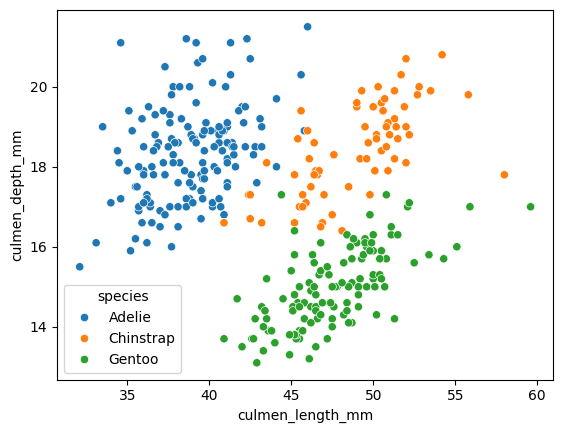

In [197]:
sns.scatterplot(data=df, x=df['culmen_length_mm'], y='culmen_depth_mm', hue='species')
plt.show()

<Axes: >

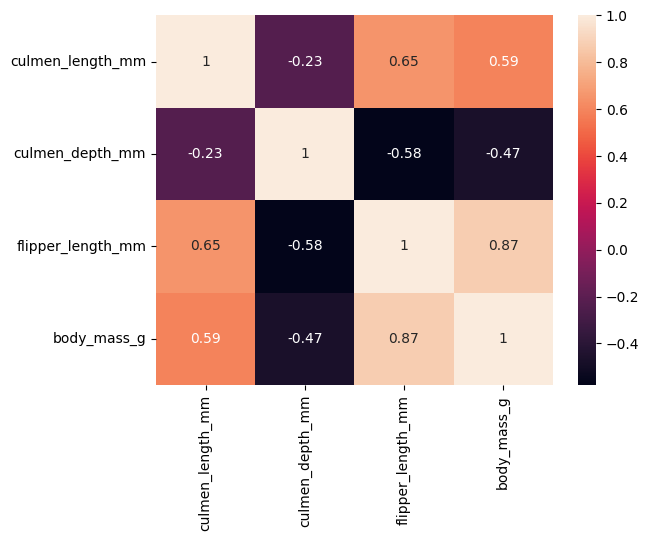

In [198]:
sns.heatmap(data=df.drop(['species', 'island', 'sex'], axis=1).corr(), annot=True)

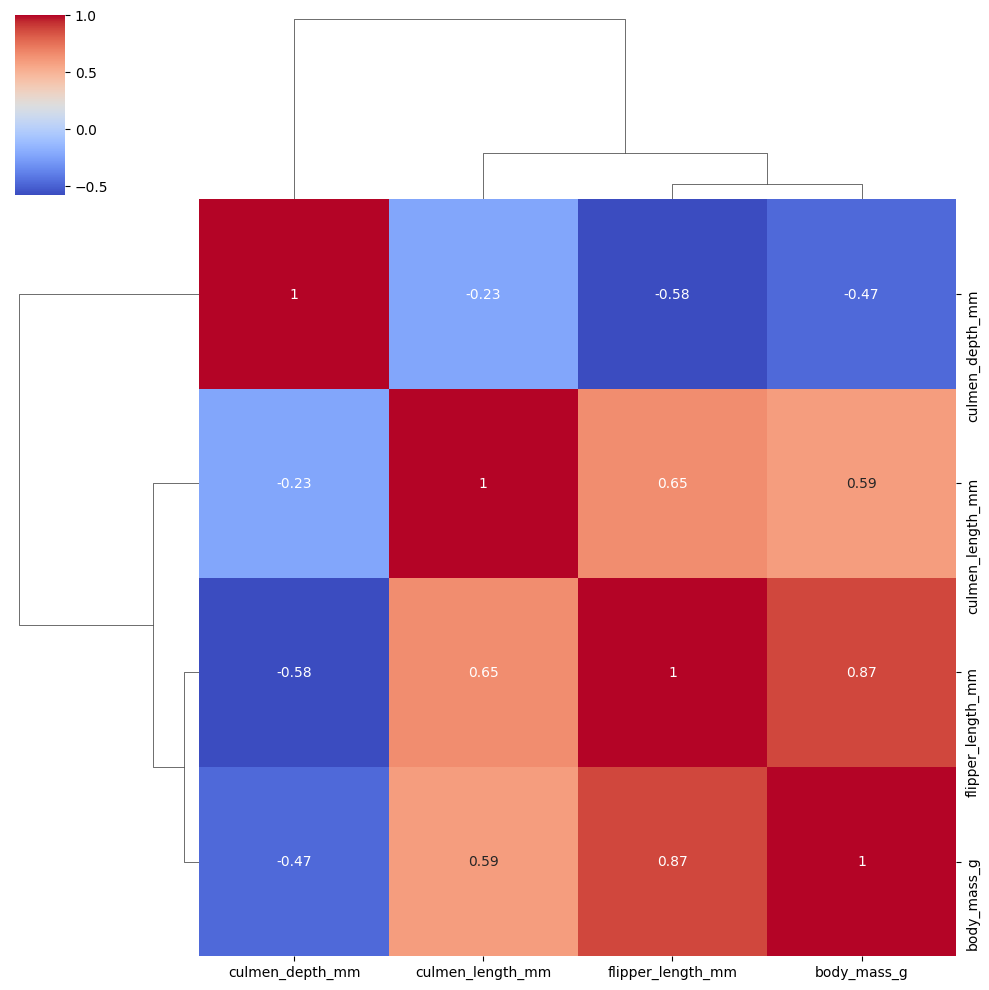

In [199]:
sns.clustermap(data=df.drop(['species', 'island', 'sex'], axis=1).corr(), annot=True, cmap='coolwarm')

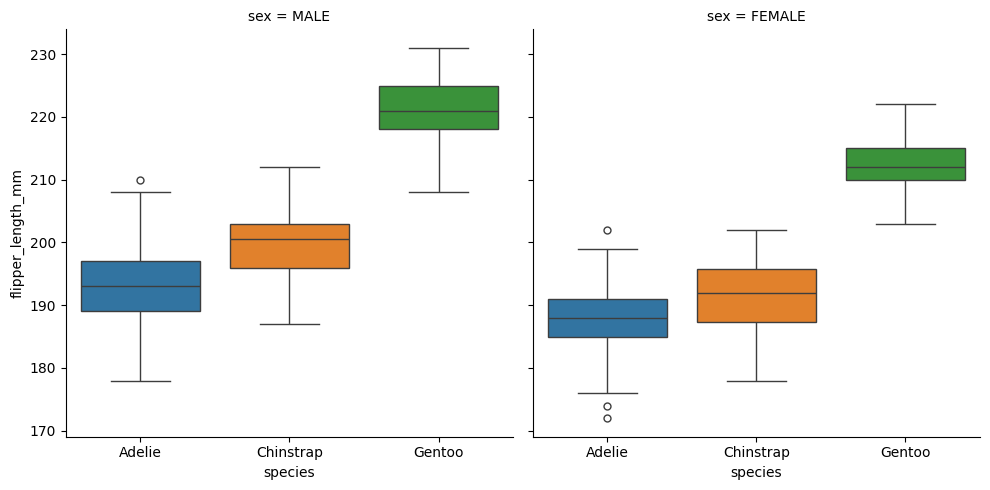

In [200]:
sns.catplot(data=df, x='species', y='flipper_length_mm', col='sex', hue='species', kind='box')

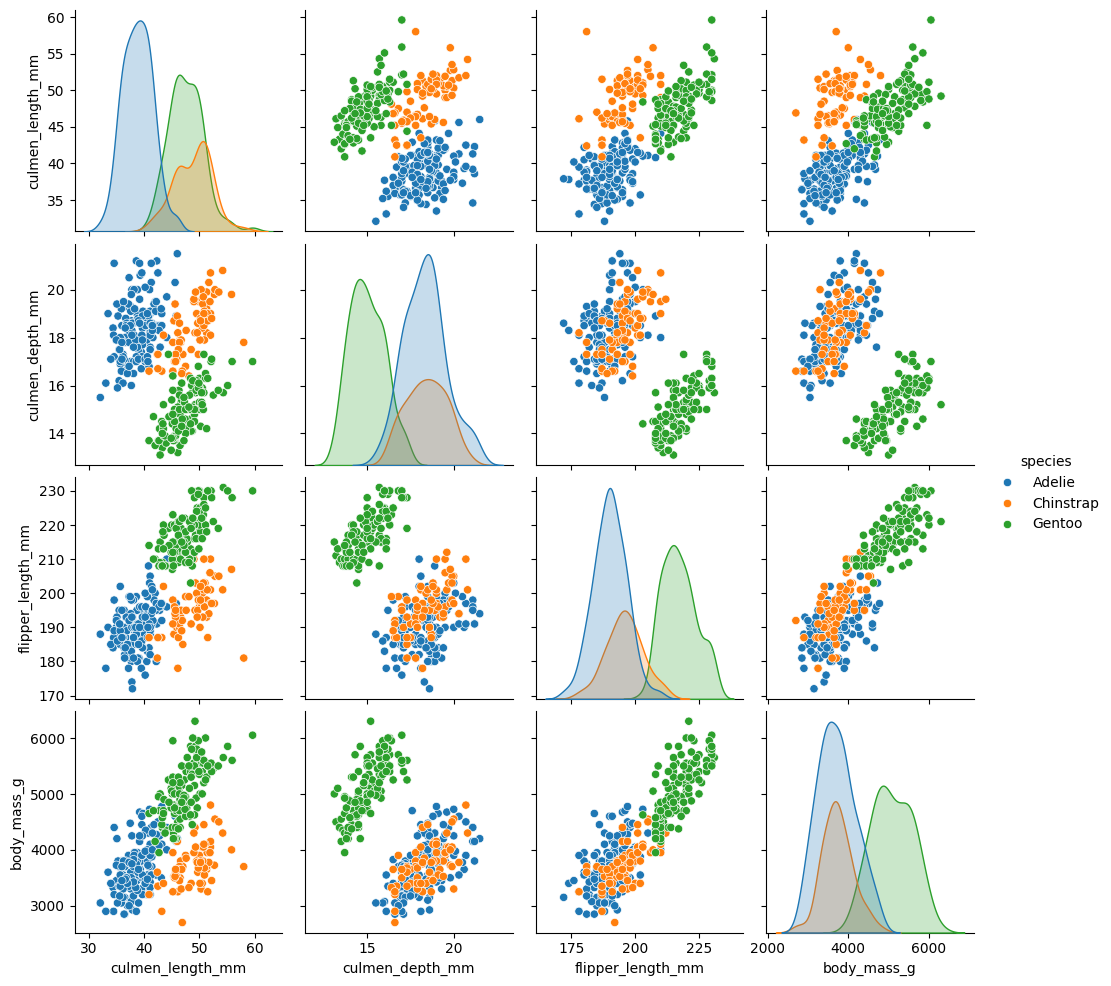

In [201]:
sns.pairplot(data=df, hue='species')

In [202]:
pd.get_dummies(df, drop_first=True).astype(int)

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,species_Chinstrap,species_Gentoo,island_Dream,island_Torgersen,sex_MALE
0,39,18,181,3750,0,0,0,1,1
1,39,17,186,3800,0,0,0,1,0
2,40,18,195,3250,0,0,0,1,0
4,36,19,193,3450,0,0,0,1,0
5,39,20,190,3650,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...
338,47,13,214,4925,0,1,0,0,0
340,46,14,215,4850,0,1,0,0,0
341,50,15,222,5750,0,1,0,0,1
342,45,14,212,5200,0,1,0,0,0


In [203]:
X = pd.get_dummies(df.drop('species', axis=1), drop_first=True).astype(int)

In [204]:
y = df['species']

In [205]:
from sklearn.model_selection import train_test_split

In [206]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [207]:
from sklearn.tree import DecisionTreeClassifier

In [208]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [209]:
y_predicted = model.predict(X_test)

In [210]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

In [211]:
cm = confusion_matrix(y_test, y_predicted)
cm

array([[39,  1,  0],
       [ 3, 24,  0],
       [ 1,  0, 32]])

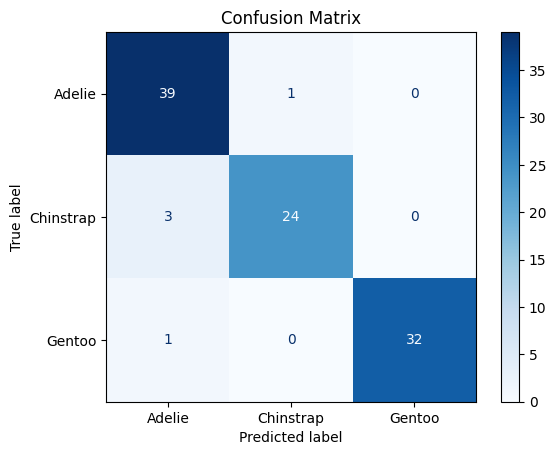

In [212]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Adelie", "Chinstrap", "Gentoo"])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

In [213]:
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

      Adelie       0.91      0.97      0.94        40
   Chinstrap       0.96      0.89      0.92        27
      Gentoo       1.00      0.97      0.98        33

    accuracy                           0.95       100
   macro avg       0.96      0.94      0.95       100
weighted avg       0.95      0.95      0.95       100



In [214]:
from sklearn.tree import plot_tree

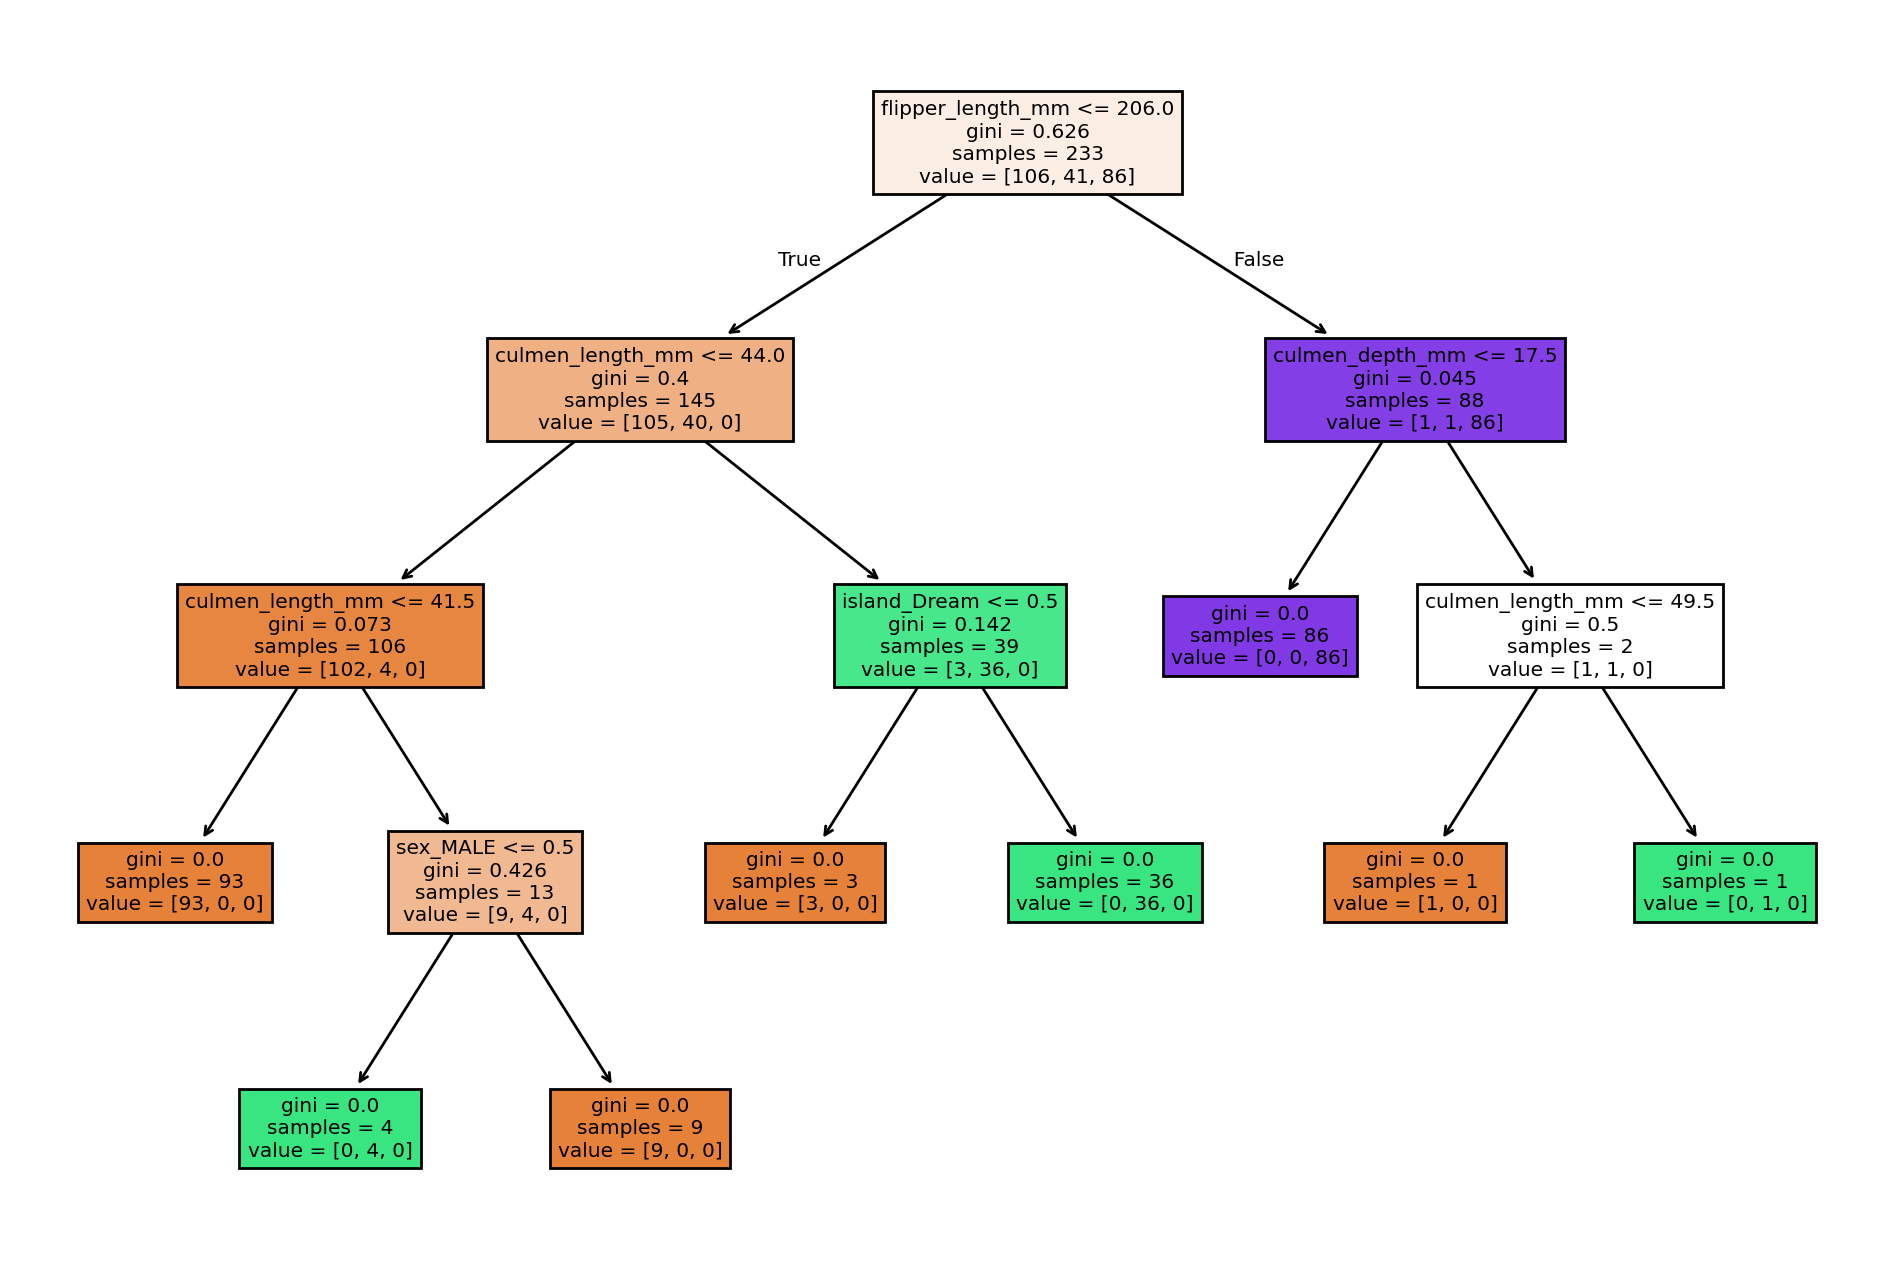

In [215]:
plt.figure(figsize=(12,8),dpi=200)
plot_tree(model, filled=True, feature_names=X.columns);

In [216]:
def report_model(model):
    model_preds = model.predict(X_test)
    print(classification_report(y_test,model_preds))
    print('\n')
    plt.figure(figsize=(12,8),dpi=150)
    plot_tree(model,filled=True,feature_names=X.columns);

In [217]:
pruned_tree = DecisionTreeClassifier(max_depth=2)
pruned_tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2)

In [218]:
DecisionTreeClassifier(max_depth=2)

DecisionTreeClassifier(max_depth=2)

              precision    recall  f1-score   support

      Adelie       0.87      1.00      0.93        40
   Chinstrap       0.95      0.78      0.86        27
      Gentoo       1.00      0.97      0.98        33

    accuracy                           0.93       100
   macro avg       0.94      0.92      0.92       100
weighted avg       0.94      0.93      0.93       100





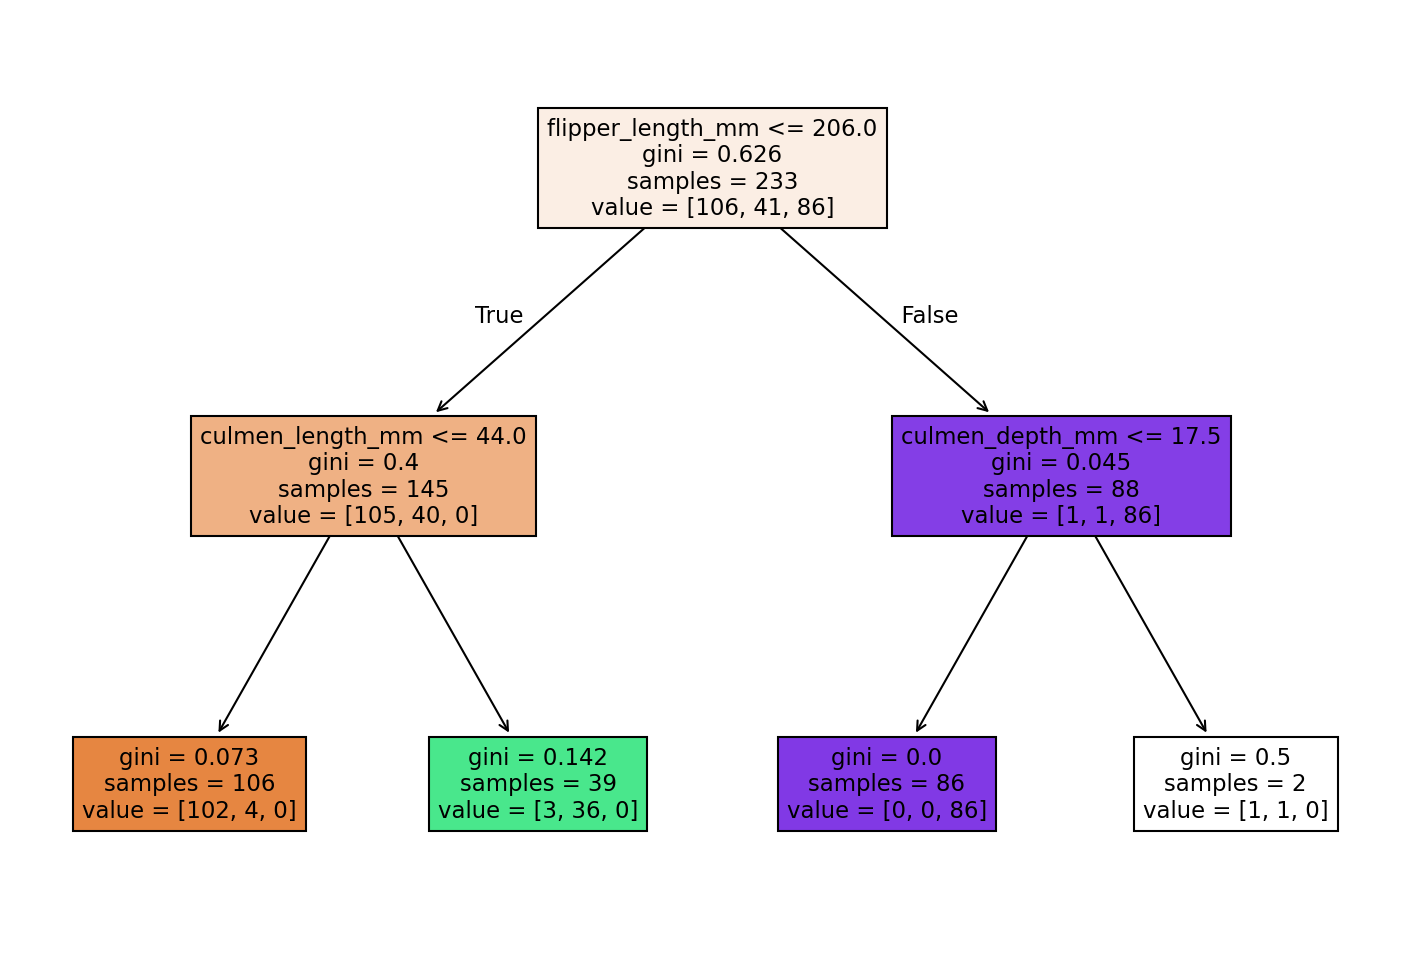

In [219]:
report_model(pruned_tree)

In [237]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
# from sklearn.preprocessing import StandardScaler



pipeline = Pipeline([
    # ('scaler', StandardScaler()),
    ('dt', DecisionTreeClassifier(class_weight='balanced', criterion='entropy'))
])

param_grid = {
    'dt__max_depth': [3, 4, 5],
    'dt__min_samples_split': [5, 10, 15],
    'dt__min_samples_leaf': [2, 4, 6]
}

model = GridSearchCV(pipeline, param_grid, cv=5)
model.fit(X_train, y_train)  # X_train и y_train — ваши данные
print("Лучшая глубина:", model.best_params_['dt__max_depth'])

Лучшая глубина: 4


In [238]:
print(f'Best params: {model.best_params_}')

Best params: {'dt__max_depth': 4, 'dt__min_samples_leaf': 2, 'dt__min_samples_split': 5}


In [239]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [240]:
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)
print("Точность на тренировке:", accuracy_score(y_train, train_pred))
print("Точность на тесте:", accuracy_score(y_test, test_pred))

Точность на тренировке: 0.9828326180257511
Точность на тесте: 0.91


In [241]:
confusion_matrix(y_test, y_predicted)

array([[39,  1,  0],
       [ 3, 24,  0],
       [ 1,  0, 32]])

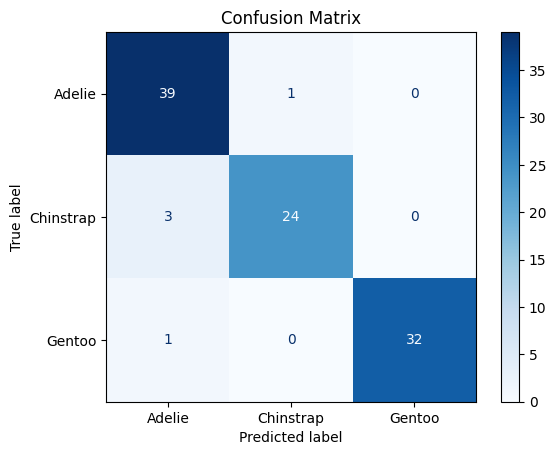

In [246]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Adelie", "Chinstrap", "Gentoo"])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

In [247]:
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

      Adelie       0.91      0.97      0.94        40
   Chinstrap       0.96      0.89      0.92        27
      Gentoo       1.00      0.97      0.98        33

    accuracy                           0.95       100
   macro avg       0.96      0.94      0.95       100
weighted avg       0.95      0.95      0.95       100



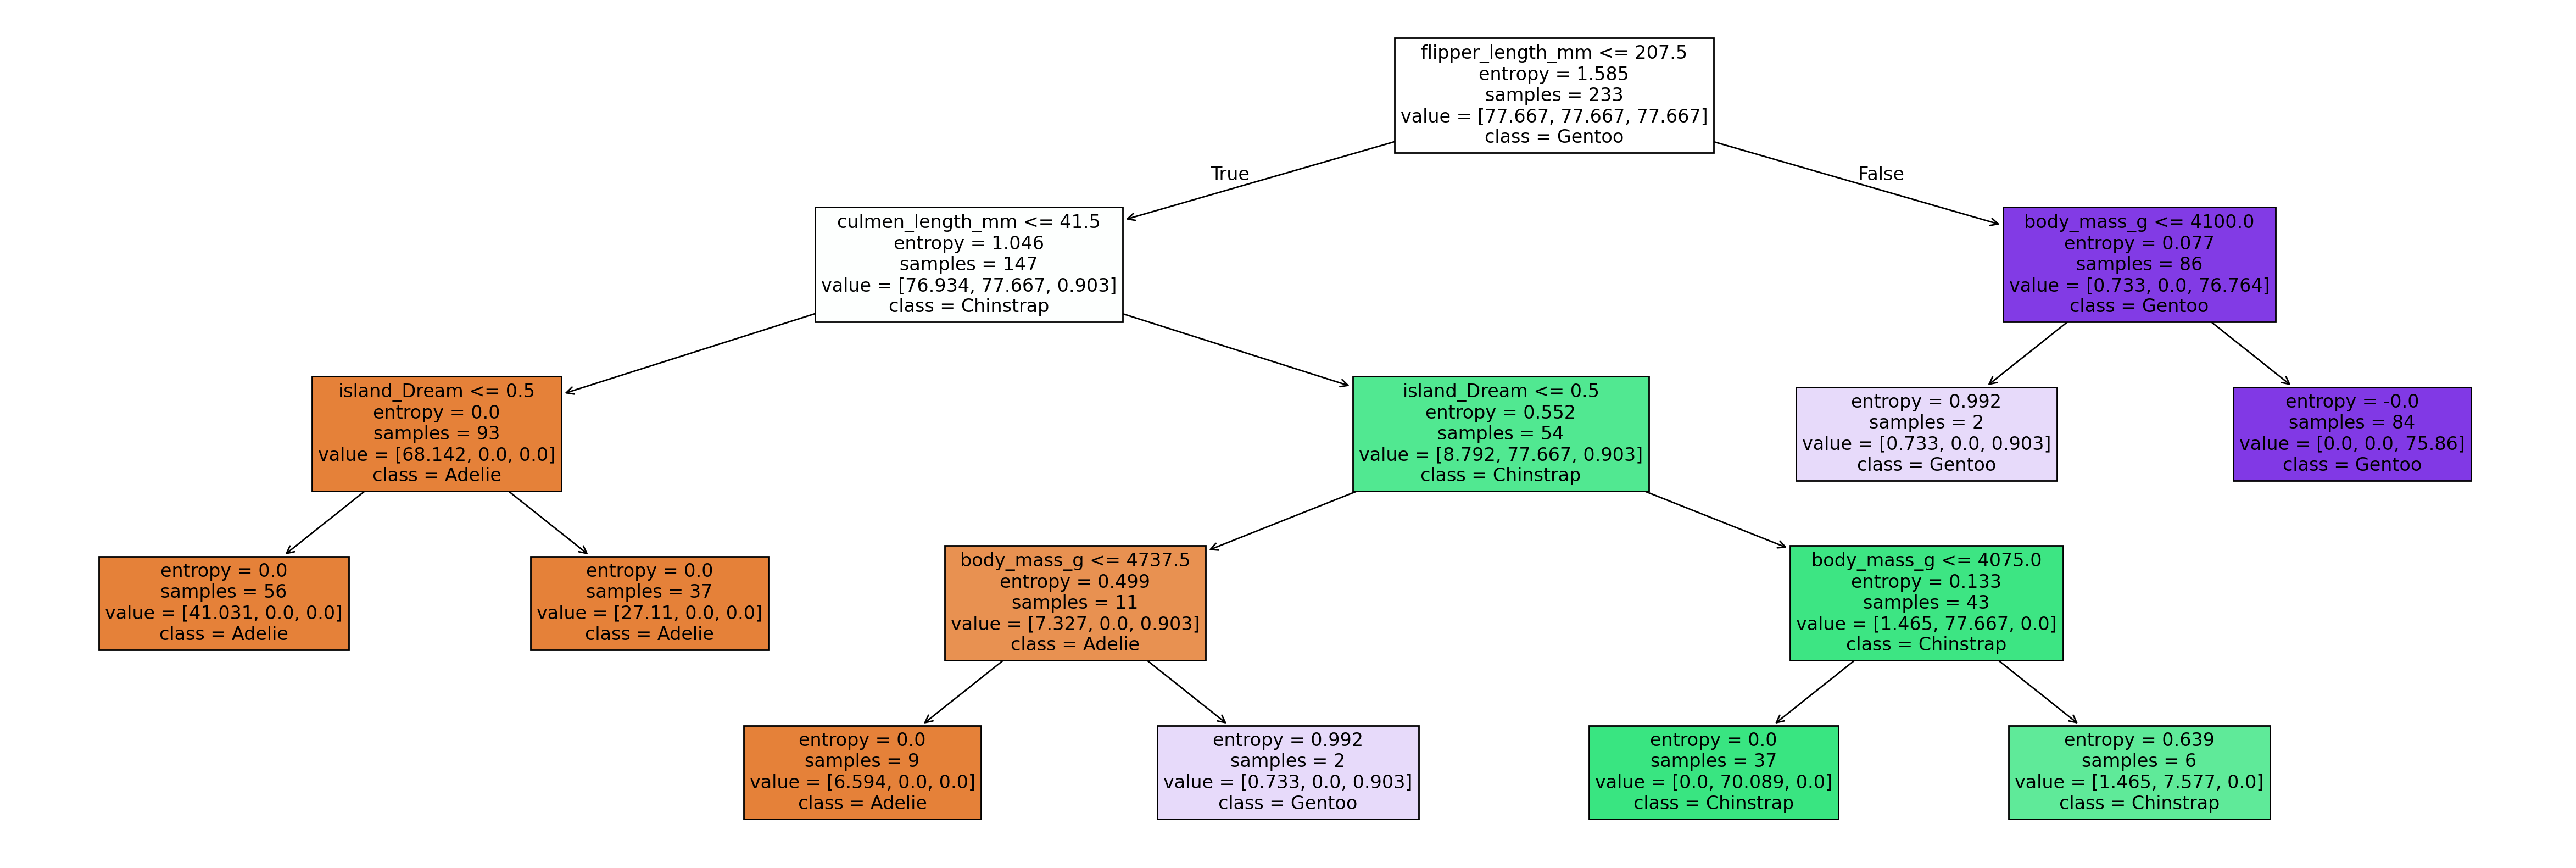

In [248]:
from sklearn.tree import plot_tree
plt.figure(figsize=(30,10), dpi=200)
plot_tree(
    model.best_estimator_.named_steps['dt'],
    feature_names=X.columns, 
    class_names=["Adelie", "Chinstrap", "Gentoo"], 
    filled=True,
    fontsize=12
)

plt.show()

model.best_estimator_ — лучшая модель, выбранная GridSearchCV.
.named_steps['dt'] — доступ к шагу dt в Pipeline, где dt — имя, заданное для DecisionTreeClassifier.
.feature_importances_ — атрибут, показывающий важность каждого признака.

In [249]:
feature_importances = model.best_estimator_.named_steps['dt'].feature_importances_
feature_importances

array([0.31737529, 0.        , 0.55711413, 0.03216657, 0.09334401,
       0.        , 0.        ])

In [245]:
pd.DataFrame(
    index=X_test.columns, 
    data=feature_importances, 
    columns=['Feature importance']
).sort_values('Feature importance')

,Feature importance
culmen_depth_mm,0.000000
island_Torgersen,0.000000
sex_MALE,0.000000
body_mass_g,0.032167
island_Dream,0.093344
culmen_length_mm,0.317375
flipper_length_mm,0.557114
